# Portafolios de Inversión
## Tarea 1
José Armando Melchor Soto

---

### Librerías 

In [3]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

---

### Investigación de las Emisoras

#### - ¿A qué se dedican?

- **PRGO (Perrigo Company PLC):** Es una empresa con sede en Irlanda, dedicada a la industria de productos farmacéuticos de venta libre de marca privada. Aunque tiene su base en Irlanda, la mayor parte de sus productos se comercializan en Estados Unidos, que representa aproximadamente el 70% de sus ventas netas. 

- **ORCL (Oracle Corp):** Es una empresa con sede en Estados Unidos, cuya sede central está en Austin. Se dedica al desarrollo de soluciones tanto en la nube como locales. Oracle ocupa el primer lugar en la categoría de bases de datos y el séptimo lugar a nivel mundial entre las compañías de tecnologías de la información.

- **GOOG (Alphabet Inc (Google)):** Es una empresa con sede en Estados Unidos, dedicada a la industria tecnológica. Su actividad principal consiste en el desarrollo de productos y servicios relacionados con internet, software y tecnología en general. Entre sus servicios más conocidos se encuentran Google Search, Google Maps, Gmail y otros. Además, Alphabet Inc. abarca diversos sectores como la biotecnología, salud, telecomunicaciones y domótica, a través de sus distintas subsidiarias e iniciativas.


#### - Sector económico

- **PRGO (Perrigo Company PLC ):** Su principal sector económico es el sector salud, con un enfoque en la industria farmacéutica, especialmente en la fabricación de productos de venta libre. Se enfoca más en los productos farmacéuticos y buscando el bienestar general.

- **ORCL (Oracle Corp):** Al igual que Alphabet Inc., pertenece al sector de la tecnología, el cual impacta diversas industrias como finanzas, salud, manufactura y tecnología. Oracle se enfoca principalmente en la gestión de datos, análisis y en mejorar la eficiencia operativa de las empresas en estos sectores. Además, tiene un gran impacto en México, ya que cuenta con un centro de desarrollo en Guadalajara, donde innova y genera mucho empleo.

- **GOOG (Alphabet Inc (Google)):** Su principal sector económico es el sector de la tecnología, que incluye servicios en línea, computación en la nube, entre otros. Su objetivo principal es operar dentro de este sector, gestionando una variedad de servicios e innovaciones, y es considerada una de las empresas líderes en la industria tecnológica.

---

### Importación de los datos

In [4]:
tickers = ['PRGO', 'ORCL' , 'GOOG']

prices = yf.download(tickers=tickers, start='2018-01-01', end='2025-05-27')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


---

### Visualización de datos

In [5]:
prices

Ticker,GOOG,ORCL,PRGO
Date,,,
2018-01-02,52.998970,41.520050,74.994514
2018-01-03,53.868855,42.481701,74.785446
2018-01-04,54.063931,42.900204,76.156754
2018-01-05,54.851692,43.158413,76.240364
2018-01-08,55.086082,43.612534,75.362427
...,...,...,...
2025-05-19,167.869995,159.639999,27.200001
2025-05-20,165.320007,160.309998,27.420000
2025-05-21,170.059998,157.179993,26.910000


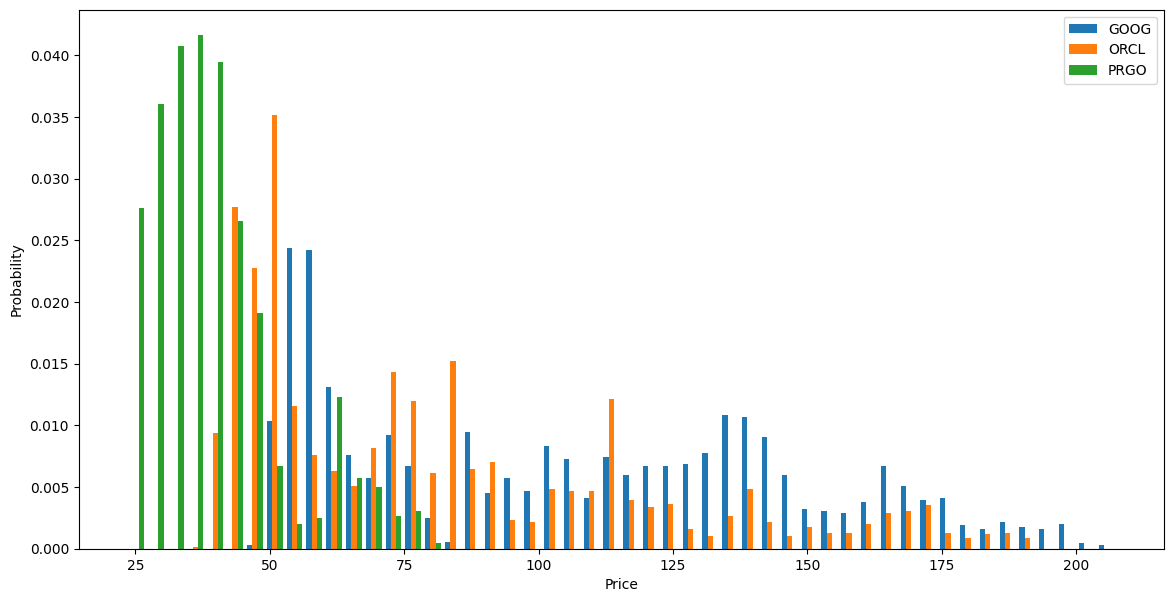

In [6]:
plt.figure(figsize=(14, 7))
plt.hist(prices, label=prices.keys(), density=True, bins=50)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.legend()
plt.show()


---

### Rendimientos Diarios

In [7]:
daily_returns = prices.pct_change().dropna()
daily_returns

Ticker,GOOG,ORCL,PRGO
Date,,,
2018-01-03,0.016413,0.023161,-0.002788
2018-01-04,0.003621,0.009851,0.018337
2018-01-05,0.014571,0.006019,0.001098
2018-01-08,0.004273,0.010522,-0.011515
2018-01-09,-0.000614,0.005534,0.007877
...,...,...,...
2025-05-19,0.002628,-0.005296,0.005545
2025-05-20,-0.015190,0.004197,0.008088
2025-05-21,0.028672,-0.019525,-0.018600


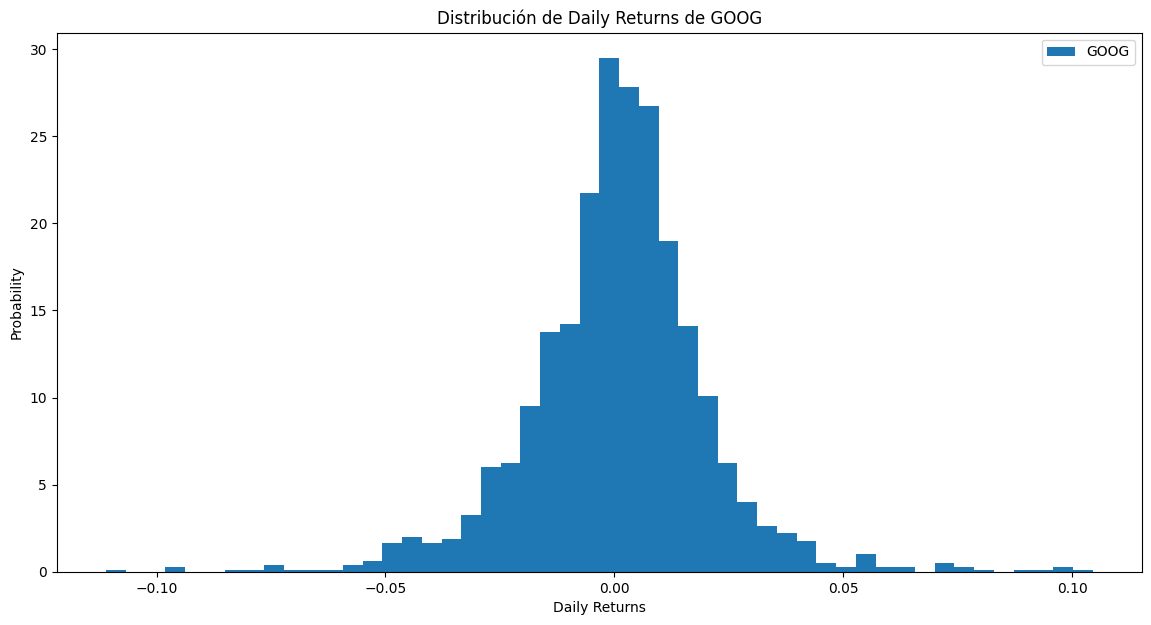

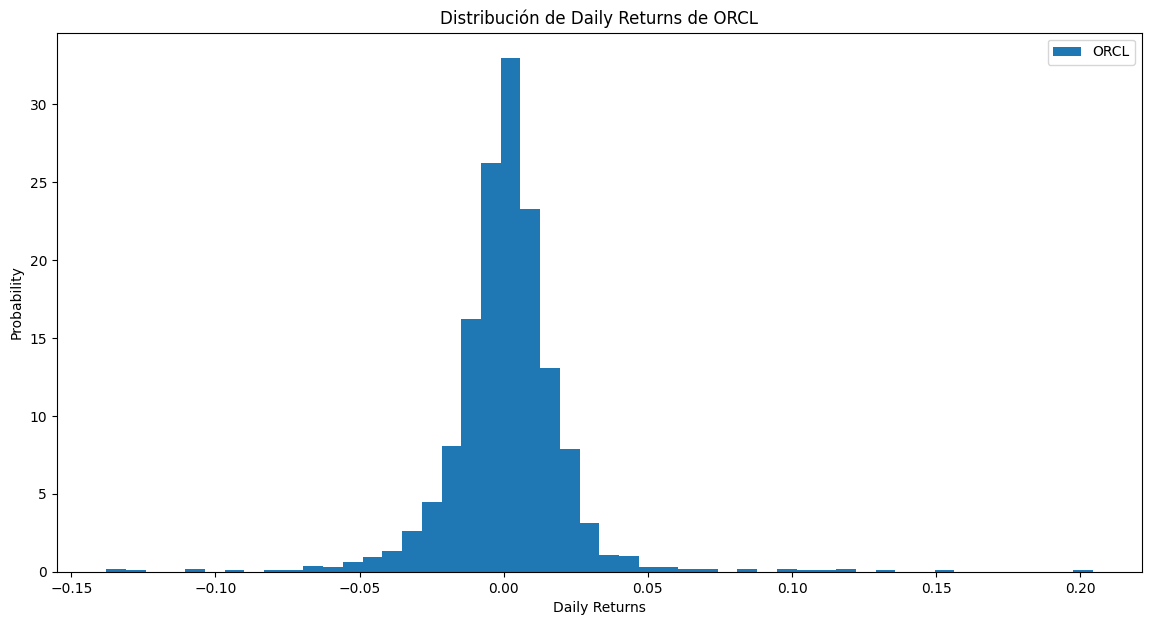

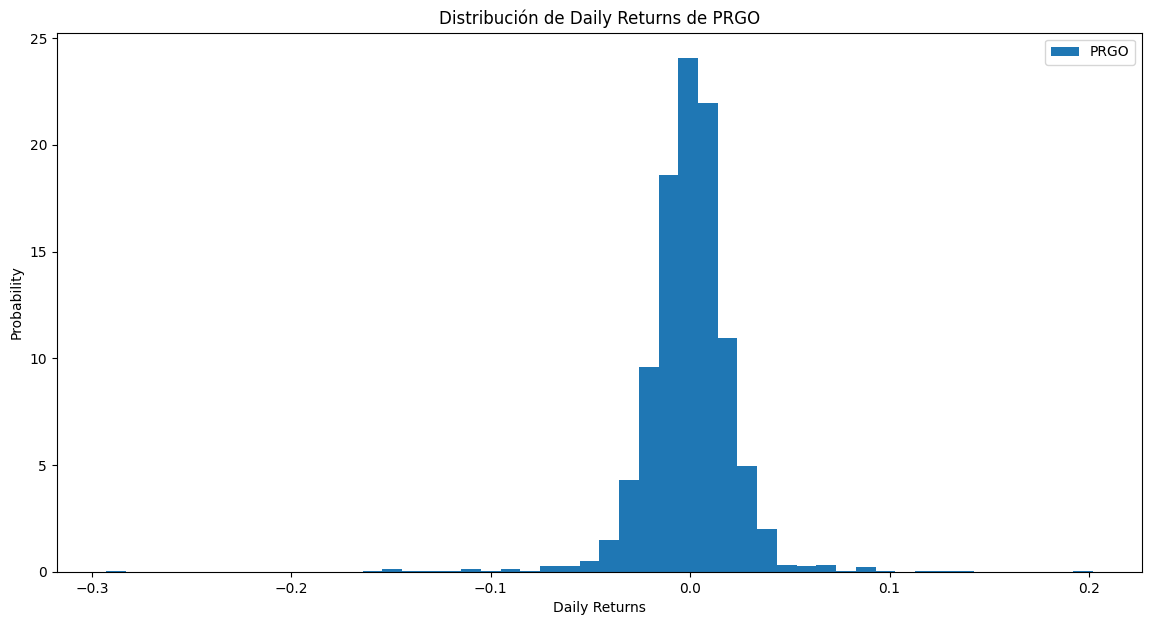

In [8]:
for stock in daily_returns.keys():
    plt.figure(figsize=(14, 7))
    plt.hist(daily_returns[stock],label=stock, density=True, bins=50)
    plt.title(f'Distribución de Daily Returns de {stock}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

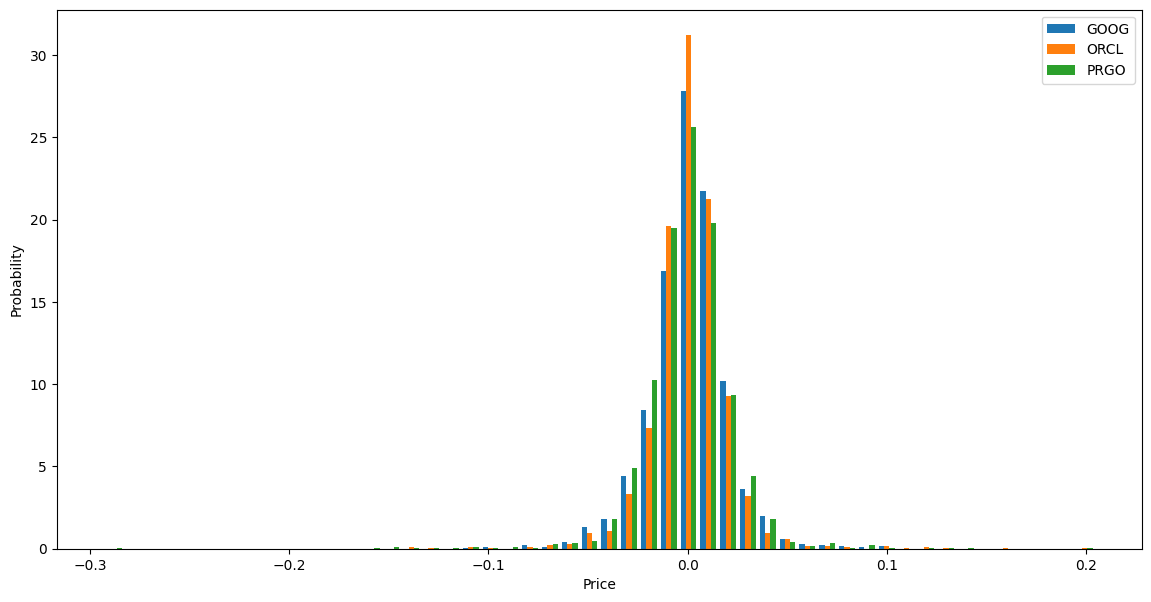

In [9]:
plt.figure(figsize=(14, 7))
plt.hist(daily_returns, label=daily_returns.keys(), density=True, bins=50)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [10]:
df= pd.DataFrame(columns=daily_returns.keys()).T
df['Daily_rate']= daily_returns.mean()
df[['Daily_rate']]

,Daily_rate
Ticker,
GOOG,0.000819
ORCL,0.000912
PRGO,-0.000287


---

### Rendimiento promedio Anual

In [11]:
df['Anual_rate']= daily_returns.mean()*252
df[['Anual_rate']]

,Anual_rate
Ticker,
GOOG,0.206322
ORCL,0.229883
PRGO,-0.072242


---

### Riesgo anual 

#### Varianza

In [12]:
df['Anual_var']=daily_returns.var()*np.sqrt(252)
df[['Anual_var']]

,Anual_var
Ticker,
GOOG,0.006110
ORCL,0.006380
PRGO,0.008398


#### Desviación Estándar / Volatilidad

In [13]:
df['Anual_Vol']= daily_returns.std()*np.sqrt(252)
df[['Anual_Vol']]

,Anual_Vol
Ticker,
GOOG,0.311437
ORCL,0.318236
PRGO,0.365124


---

### Coeficiente de Variación

In [14]:
df['CV'] = df['Anual_Vol'] / df['Anual_rate']
df['CV']

Ticker
GOOG    1.509472
ORCL    1.384338
PRGO   -5.054204
Name: CV, dtype: float64

---

### Asimetría

In [15]:
df['Skewness']= daily_returns.skew()
df[['Skewness']]

,Skewness
Ticker,
GOOG,-0.046298
ORCL,0.629871
PRGO,-1.287364


---

In [16]:
w= np.ones(3)/3
w

array([0.33333333, 0.33333333, 0.33333333])

In [17]:
Rend_port = sum(df['Anual_rate'] * w)
Rend_port*100

12.132113050346858

In [18]:
COV = daily_returns.cov()
COV

Ticker,GOOG,ORCL,PRGO
Ticker,,,
GOOG,0.000385,0.000181,0.000119
ORCL,0.000181,0.000402,0.000119
PRGO,0.000119,0.000119,0.000529


In [19]:
Var_port = (w.T @ COV @ w) * 252
Volat_port = np.sqrt(Var_port)
Var_port*100, Volat_port*100

(6.032316080770612, 24.560773767881606)

### Todos

In [20]:
df*100

,Daily_rate,Anual_rate,Anual_var,Anual_Vol,CV,Skewness
Ticker,,,,,,
GOOG,0.081874,20.632155,0.610997,31.143660,150.947200,-4.629822
ORCL,0.091224,22.988340,0.637968,31.823629,138.433779,62.987098
PRGO,-0.028667,-7.224156,0.839807,36.512358,-505.420400,-128.736418


---

### Conclusión

Esto nos indica que el mejor activo, el cual tiene mejor rendimiento diario y anual, es el de `ORCL`, pero con un riesgo bastante elevado, por lo que no sería lo más recomendable si lo que se busca es seguridad al invertir nuestro dinero. Aun así, muestra un buen equilibrio entre el riesgo y el retorno.

También se puede decir que `PRGO` es un activo que no tiene un buen rendimiento, pero podría parecer más seguro al momento de invertir, ya que da la impresión de no tener un riesgo tan alto. Sin embargo, tiende a generar más pérdidas que ganancias, lo cual lo vuelve poco atractivo.

Por su parte, `GOOG` es un activo que presenta un mayor equilibrio en comparación con los otros dos, ya que tiene buenos rendimientos anuales de 20.63% y una relación aceptable entre riesgo y retorno. En cuanto a su asimetría, podría indicar una ligera inclinación hacia las pérdidas, pero no tan marcada.


En conclusión, `ORCL` y `GOOG` pueden considerarse los dos activos más atractivos, dependiendo de lo que se esté buscando. Ambas son buenas opciones, ya que muestran un equilibrio entre el riesgo y el retorno. Sin embargo, podría decirse que invertir en `ORCL` es la mejor opción frente a las otras dos, ya que presenta un mejor rendimiento diario y anual, aunque su riesgo sea ligeramente mayor que el de `GOOG`.


